# Machine Learning 과정
- 문제정의
- 데이터 수집
- 데이터 전처리 (인코딩,특성공학)
- 탐색적 데이터 분석 (시각화, 특성선택)
- 모델 선택 및 학습
- 하이퍼파라미터 튜닝 (교차검증,그리드서치)
- 모델 평가

In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 사전
- PassengerId : 탑승객 id
- Survived : 생존여부 (0 = 사망, 1 = 생존)
- Pclass : 티켓 클래스 (1등급, 2등급, 3등급)
- Name : 이름
- Sex : 성별 (male = 남성, female = 여성)
- Age : 나이
- SibSp : 형제/배우자의 수
- Parch : 부모/자녀 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 승선항 C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


비어있는 나이는 중간 값으로 채우자 (중간 값으로 하면 이상치에 대해 보완가능)

In [6]:
data['Age'].median()

28.0

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())#  = fillna(28.0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


시각화 편의를 위해 Died 컬럼 추가

In [9]:
data['Died'] = 1 - data['Survived']

### 성별과의 관계

In [10]:
data.groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died
Sex,,,,,,,,
female,135343,233,678,8770.00,218,204,13966.6628,81
male,262043,109,1379,17391.17,248,136,14727.2865,468


In [11]:
data.groupby('Sex').sum()[['Survived', 'Died']]

,Survived,Died
Sex,,
female,233,81
male,109,468


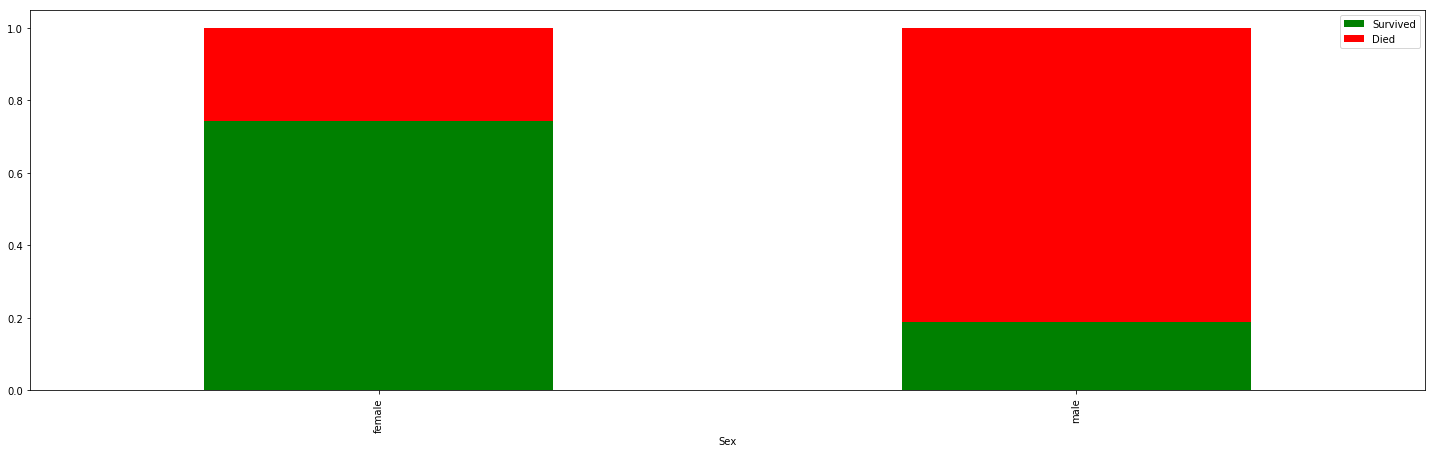

In [12]:
data.groupby('Sex').mean()[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r']); # stacked 한줄로 겹치겠다.

남성이 많이 죽고 여성이 많이 살았다. (성별 컬럼은 생존과 관계가 많다)

### 나이와의 관계

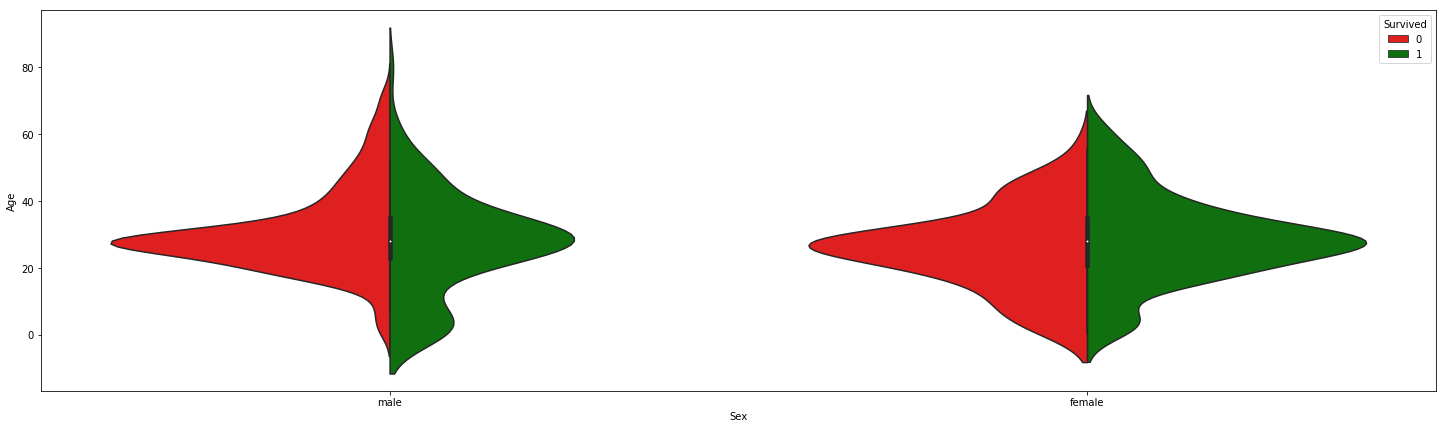

In [13]:
fig = plt.figure(figsize=(25, 7)) #그림 크기 지정
sns.violinplot(x='Sex', y='Age', #바이올린 그래프
               hue='Survived', data=data, 
               split=True,#따로 떨어져서 보임
               palette={0: "r", 1: "g"}
              )

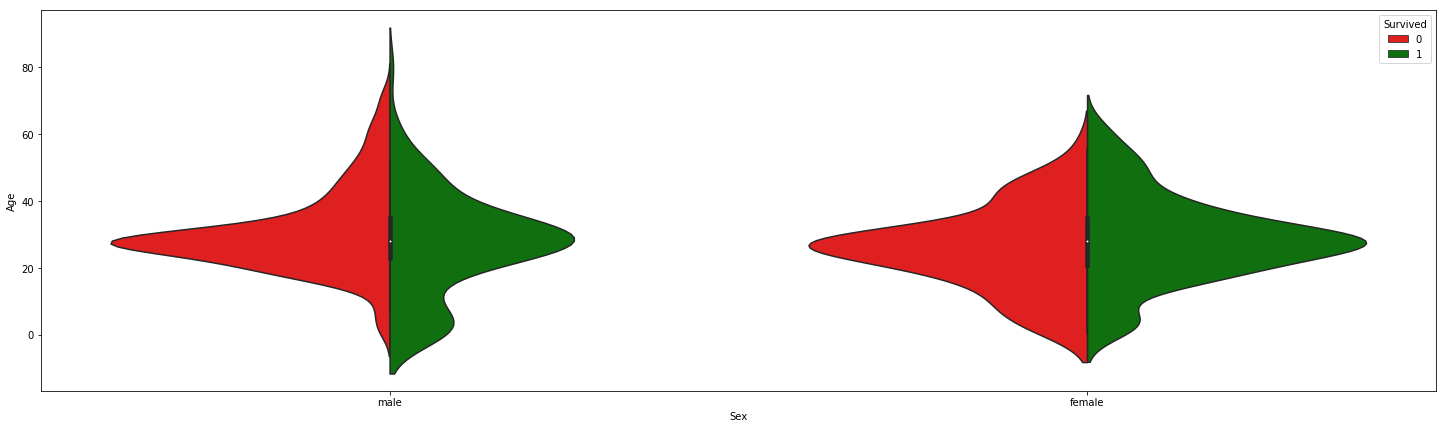

In [14]:
fig = plt.figure(figsize=(25, 7)) #그림 크기 지정
sns.violinplot(x='Sex', y='Age', #바이올린 그래프
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              )

- 남성 탑승객중 어린아이들이 조금 더 많이 살았다.
- 20~40 탑승객(남,여 모두)이 많이 사망했다.

### 요금과의 관계

C:\Users\pc-23\Anaconda312\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


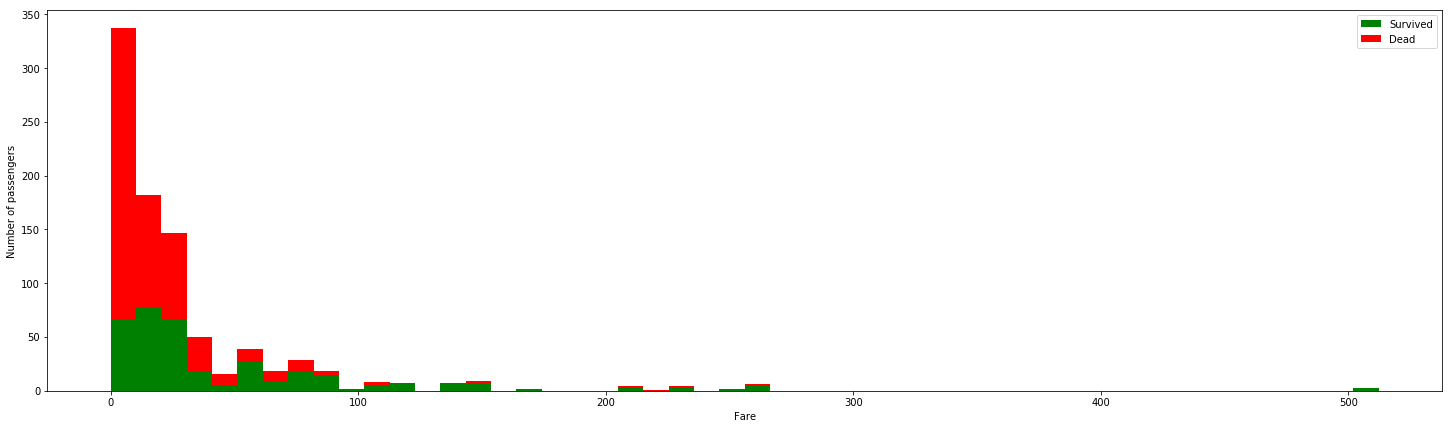

In [15]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

티켓 요금이 낮으면 많이 죽었다.

### 티켓요금과 선실등급과의 관계

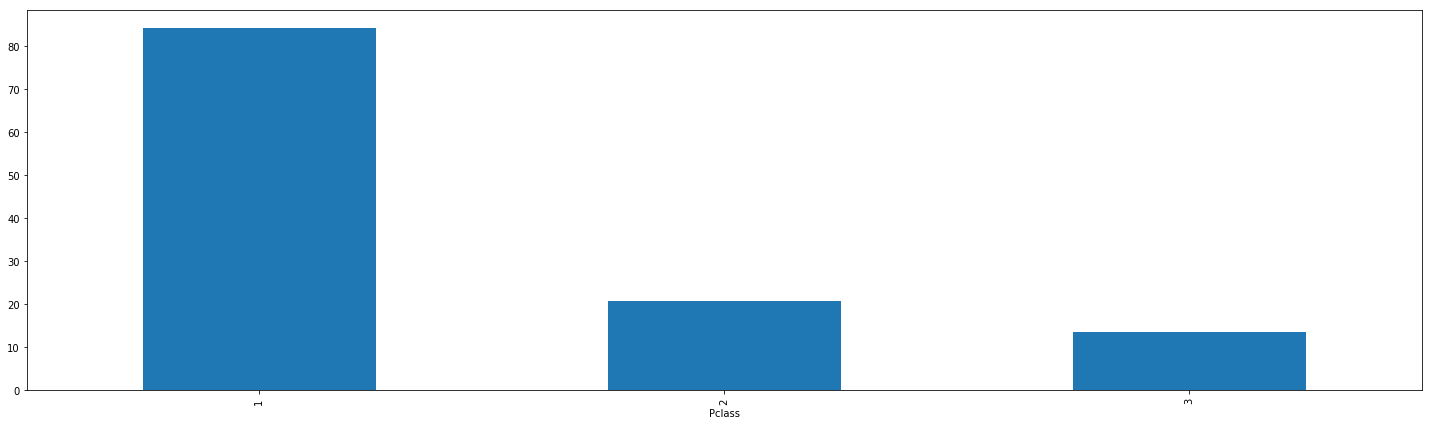

In [16]:
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7))

선실등급이 낮을 수록 티켓 가격이 싸다

### 승선항과의 관계

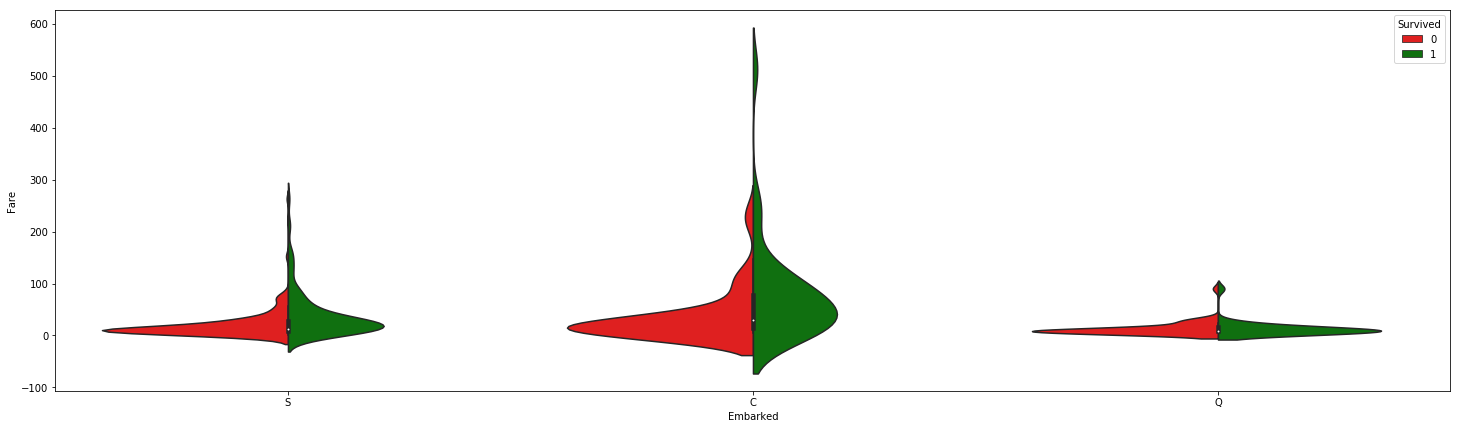

In [17]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

- C,S는 요금 폭이 넓다
- 요금이 높은 사람들은 거의 죽지 않았다.

# Feature engineering

###  데이터로드
train과 test를 병합해서 사용(한번에 처리하기위해)

In [18]:
# train,test 데이터 로드
train = pd.read_csv('./train.csv')    
test = pd.read_csv('./test.csv')

# 생존여부를 별도로 분리
# inplace 속성으로 drop결과를 바로 적용
targets = train.Survived#train["Survived"]
train.drop(['Survived'], axis = 1, inplace=True)
    
# 두 개의 데이터 병합
# ignore_index 속성으로 train,test의 인덱스를 순차적으로 만듬
# 각자의 인덱스를 무시하고 다시 셋팅한다. 
combined = train.append(test,ignore_index=True)
    
# PassengerId는 삭제
combined.drop(['PassengerId'], 1, inplace=True)
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
targets.shape, targets[:5]

((891,), 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [20]:
combined.shape

(1309, 10)

In [21]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 탑승객 호칭 처리

- Braund, <b> Mr.</b> Owen Harris	
- Heikkinen, <b>Miss.</b> Laina
- Oliva y Ocana, <b>Dona.</b> Fermina (귀부인)
- Peter, <b>Master.</b> Michael J (도련님)

In [22]:
s="Heikkinen, Miss. Laina"
s.split(",")[1].split(".")[0].strip()


'Miss'

In [23]:
def split_title(x):
    return x.split(',')[1].split('.')[0].strip() #strip 공백을 지워줌

In [24]:
data["Name"].apply(split_title)

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Name, Length: 891, dtype: object

In [25]:
titles = data["Name"].apply(split_title).unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

몇 개의 타이틀로 정리

- Officer (장교)
- Royalty (귀족)
- Mr
- Mrs
- Miss
- Master

In [26]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [27]:
combined['Title'] = combined["Name"].apply(split_title)
#map함수를 통해 딕셔너리의 키 값과 시리즈의 인덱스 값이 같은 데이터를 찾아 변경
combined['Title'] = combined.Title.map(Title_Dictionary)

In [28]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 나이 처리

- 시각화를 위해 중간 값으로 단순히 처리했지만, 좀 더 세분화 해서 나이를 채워보자
- 성별,선실등급,호칭으로 묶어서 평균나이를 구해보자

In [29]:
# as_index 속성으로 그룹을 묶는 컬럼을 인덱스에서 제외하자
#891까지 자르는 이유는 test에 train의 정보를 누수하는 느낌
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'],as_index = False)
grouped_median_train = grouped_train.mean()
grouped_median_train = grouped_median_train[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,29.744681
1,female,1,Mrs,40.400000
2,female,1,Officer,49.000000
3,female,1,Royalty,40.500000
4,female,2,Miss,22.390625
5,female,2,Mrs,33.547619
6,female,3,Miss,16.123188
7,female,3,Mrs,33.515152
8,male,1,Master,5.306667
9,male,1,Mr,41.580460


성별과 선실등급 그리고 호칭에 따라 평균 나이가 조금씩 다르다.

In [30]:
def fill_age(row):
    condition = (
            (grouped_median_train['Sex'] == row['Sex']) & 
            (grouped_median_train['Title'] == row['Title']) & 
            (grouped_median_train['Pclass'] == row['Pclass'])
        ) 
    if np.isnan(row['Age']): 
        print(grouped_median_train[condition]['Age'])
        return grouped_median_train[condition]['Age'].values[0]
    else :
        return row['Age']#null이 아니라면 원래나이

In [31]:
combined['Age'] = combined.apply(fill_age, axis=1)

16    28.724891
Name: Age, dtype: float64
13    32.768293
Name: Age, dtype: float64
7    33.515152
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
6    16.123188
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
1    40.4
Name: Age, dtype: float64
6    16.123188
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
6    16.123188
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
9    41.58046
Name: Age, dtype: float64
9    41.58046
Name: Age, dtype: float64
15    5.350833
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
6    16.123188
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
6    16.

16    28.724891
Name: Age, dtype: float64
9    41.58046
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
6    16.123188
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
6    16.123188
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
6    16.123188
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
9    41.58046
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
13    32.768293
Name: Age, dtype: float64
6    16.123188
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
15    5.350833
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
15    5.350833
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
16    28.724891
Name: Age, dtype: float64
7    33.515152
Name: Age, dtype: float64
16 

### 이름 처리
- 이름 특성 삭제
- 카테고리화 되어있는 호칭을 Model이 계산 할 수 있도록 one-hot-encoding

In [32]:
#이름 특성 삭제
combined.drop('Name', axis=1, inplace=True)

In [33]:
titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
titles_dummies.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [34]:
combined = pd.concat([combined, titles_dummies], axis=1)
combined.drop('Title', axis=1, inplace=True)

In [35]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### 요금 처리

In [36]:
combined.Fare.fillna(combined.Fare.mean(), inplace=True)

### 승선항 처리

- 결측치는 많은 사람들이 탑승한 S로 채운다
- encoding

In [37]:
combined.iloc[:891].Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
# 결측치 처리
combined.Embarked.fillna('S', inplace=True)
    
# one-hot-encoding
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)

# 승선항 특성 삭제
combined.drop('Embarked', axis=1, inplace=True)

In [39]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### 객실번호 
- 결측치는 U(Uknown)로 대체
- 숫자를 제거한 맨 앞 글자로 변경
- encoding

In [40]:
# 결측치는 U로 대체
combined['Cabin'].fillna('U',inplace=True)

In [41]:
# Cabin의 첫 글자로 변경
combined['Cabin'] = combined['Cabin'].str[0]

In [42]:
# one-hot-encoding
cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
combined = pd.concat([combined, cabin_dummies], axis=1)

# Cabin 특성 삭제
combined.drop('Cabin', axis=1, inplace=True)

In [43]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


### 성별 처리

In [44]:
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

남성은 1 여성은 0으로 변경

In [45]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


### 객실등급 처리

In [46]:
# one-hot-encoding
pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
combined = pd.concat([combined, pclass_dummies],axis=1)
    
# 객실등급 특성 삭제
combined.drop('Pclass',axis=1,inplace=True)

In [47]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### 티켓 처리

filter : 두번째 인수인 반복 가능한 자료형 요소들을 첫번째 인자 함수에 하나씩 입력하여 리턴값이 참인 것만 묶어서 돌려준다.

### filter와 isdigit()함수 테스트

In [48]:
ticket = ['A/5 21171','STON/O2.3101282     ','113803']
list(map(lambda t : t.strip(), ticket))

['A/5 21171', 'STON/O2.3101282', '113803']

In [49]:
ticket1 = list(filter(lambda t : not t.isdigit(), ticket))
ticket1

['A/5 21171', 'STON/O2.3101282     ']

### -----------------------------------

In [50]:
def cleanTicket(ticket):
    # .과/를 없애준다.
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    # 공백 기준으로 자른다.
    ticket = ticket.split()
    print(ticket)
    # 자른 리스트의 각 항목의 양쪽 공백을 없애준다.
    ticket = map(lambda t : t.strip(), ticket)
    # 숫자가 아닌 것만 필터링해서 리스트로 만듬
    # isdigit 숫자로만 구성된 문자열을 감지
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX' #티켓 글자가 없으면 XXX로 표시

In [51]:
combined['Ticket'] = combined['Ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
combined = pd.concat([combined, tickets_dummies], axis=1)
combined.drop('Ticket', inplace=True, axis=1)

['A5', '21171']
['PC', '17599']
['STONO2', '3101282']
['113803']
['373450']
['330877']
['17463']
['349909']
['347742']
['237736']
['PP', '9549']
['113783']
['A5', '2151']
['347082']
['350406']
['248706']
['382652']
['244373']
['345763']
['2649']
['239865']
['248698']
['330923']
['113788']
['349909']
['347077']
['2631']
['19950']
['330959']
['349216']
['PC', '17601']
['PC', '17569']
['335677']
['CA', '24579']
['PC', '17604']
['113789']
['2677']
['A5', '2152']
['345764']
['2651']
['7546']
['11668']
['349253']
['SCParis', '2123']
['330958']
['SCA4', '23567']
['370371']
['14311']
['2662']
['349237']
['3101295']
['A4', '39886']
['PC', '17572']
['2926']
['113509']
['19947']
['CA', '31026']
['2697']
['CA', '34651']
['CA', '2144']
['2669']
['113572']
['36973']
['347088']
['PC', '17605']
['2661']
['CA', '29395']
['SP', '3464']
['3101281']
['315151']
['CA', '33111']
['CA', '2144']
['SOC', '14879']
['2680']
['1601']
['348123']
['349208']
['374746']
['248738']
['364516']
['345767']
['345779']
['33

In [52]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 가족관련 특성 처리
- 부모,자녀,배우자,형제 모두 합친 특성을 새롭게 만듬
- 가족 숫자에 따라 1인, 소규모 가족, 대규모 가족으로 구분

In [53]:
# 본인을 포함하여 모든 가족수 특성 생성
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

# map함수는 apply처럼 함수를 넣어서 사용가능
# lambda는 간단한 함수를 줄여서 쓰는 방식
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

In [54]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


# Modeling

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

train과 test를 분리

In [56]:
train = combined.iloc[:891]
test = combined.iloc[891:]

In [57]:
targets.shape, train.shape

((891,), (891, 67))

In [58]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(train, targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_#feature별 가중치 크기
features.head(1)

,feature,importance
0,Sex,0.095488


In [60]:
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

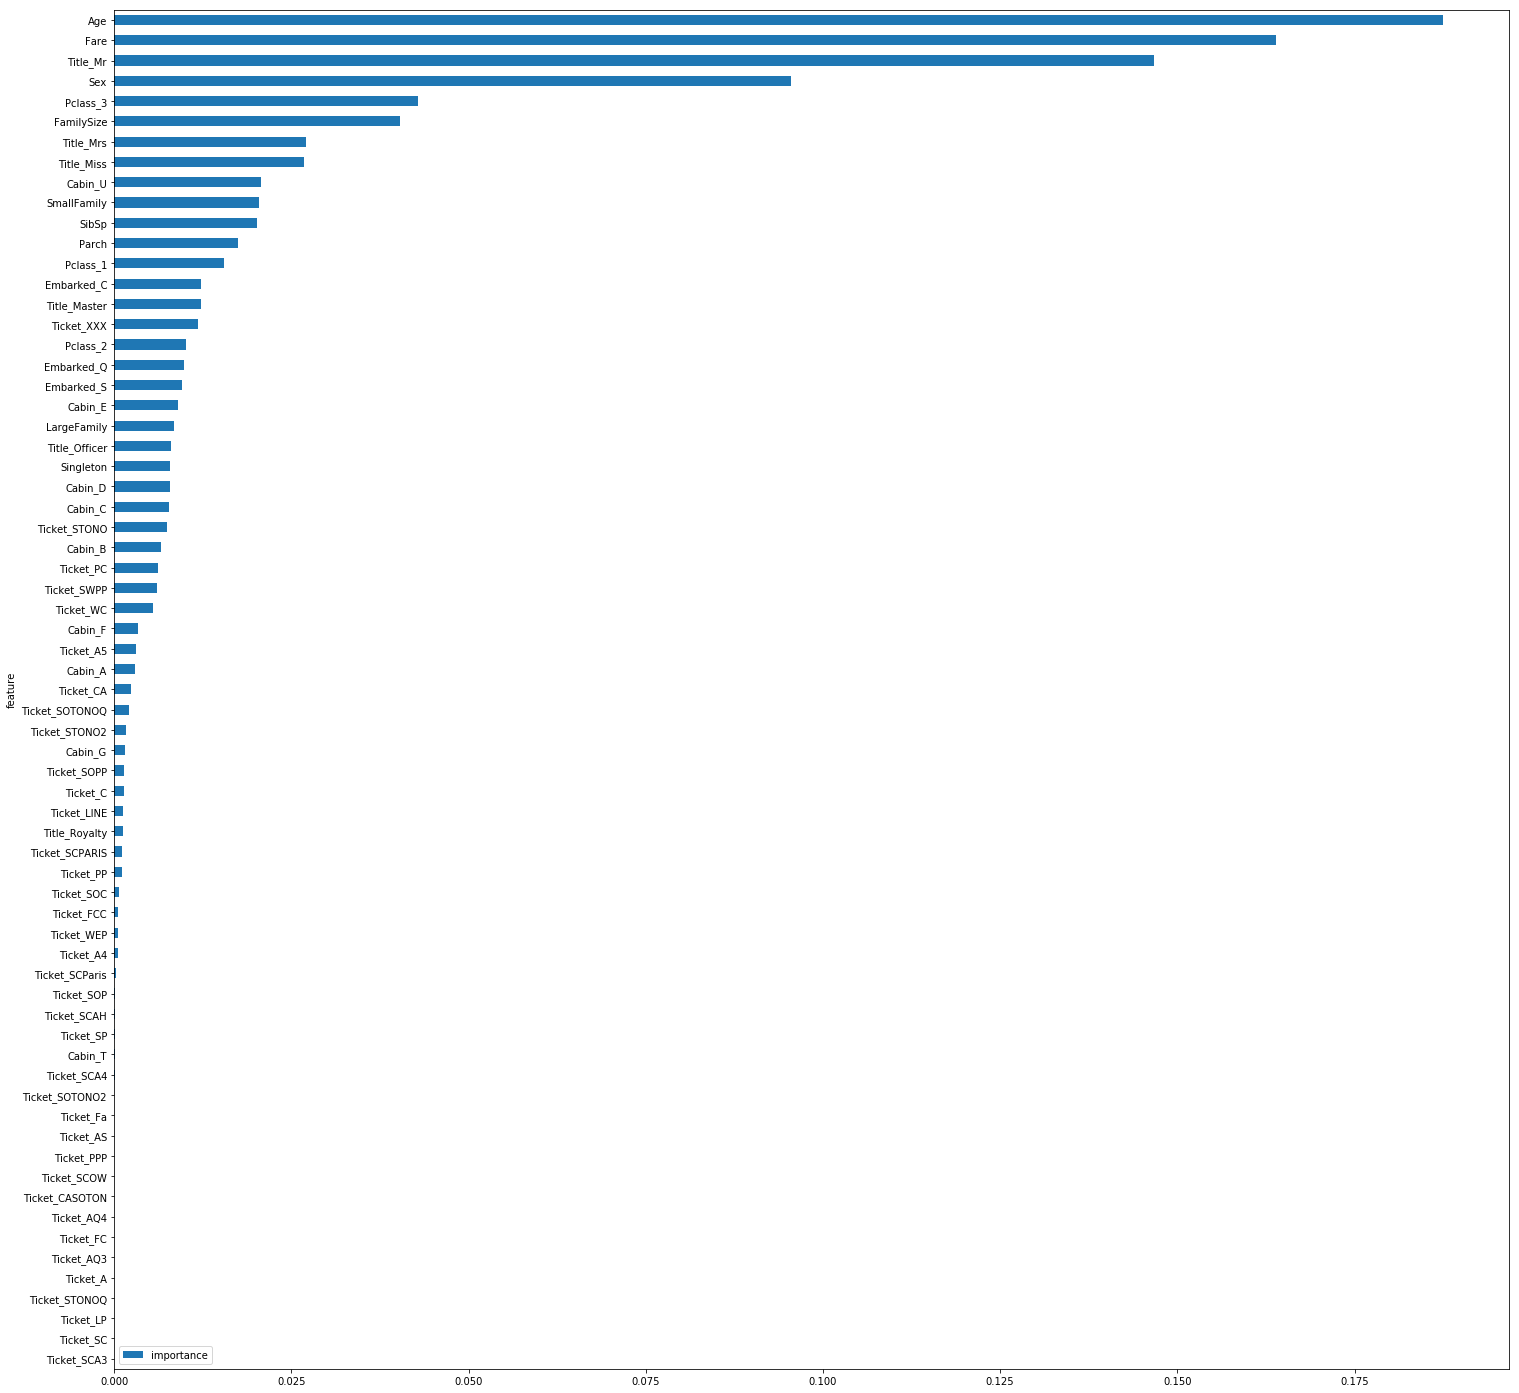

In [61]:
features.plot(kind='barh', figsize=(25, 25))

Title_Mr, Age, Fare, Sex 등이 중요한 특성으로 나타난다

In [62]:
#중요도 가중치에 따라 기능을 선택하는 메타 변압기
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)

# 모든 특성 중요도 값의 평균 이상인 특성들을 선택
# threshold를 이용해 임계치 지정가능
train_reduced = model.transform(train)
train_reduced.shape

(891, 13)

In [63]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 13)

In [64]:
clf = clf.fit(train_reduced, targets)

In [65]:
clf.score(train_reduced,targets)

0.98653198653198648

In [66]:
predict_result = clf.predict(test_reduced)
predict_result

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [68]:
df_output = pd.DataFrame()#캐글에 올릴 데이터 만듬
aux = pd.read_csv('./test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = predict_result
df_output.to_csv('result_submit.csv',index=False)

In [73]:
from sklearn.model_selection import GridSearchCV
m = RandomForestClassifier(random_state=92)
param_grid = {'max_depth': [7,13], # 트리의 노드 깊이
             "n_estimators":[10,30,50,100], # 트리의 개수
             "max_features":[0.2,0.4,0.6], # 하나의 노드에서 고려될 특성의 범위(0.2 = 전체 특성 중 20%만 선택)
             'min_samples_leaf': [10,30,50] # 리프 노드에서 최소 존재해야할 샘플의 개수 (과대적합을 보완해줌)
             }
grid = GridSearchCV(m, param_grid, cv=5)
grid.fit(train_reduced, targets)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.83
최적의 매개변수:  {'max_depth': 7, 'max_features': 0.6, 'min_samples_leaf': 10, 'n_estimators': 10}


In [71]:
#최상의 결과로 예측
final_model = RandomForestClassifier(random_state=92,max_depth=5,max_features=0.4,min_samples_leaf=10,n_estimators=50)
final_model.fit(train_reduced, targets)
predict_result = final_model.predict(test_reduced)
df_output = pd.DataFrame()
aux = pd.read_csv('./test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = predict_result
df_output.to_csv('result_submit.csv',index=False)

# 히트맵 그리기
### "max_depth","max_features" 기준으로

In [ ]:
grid.cv_results_# 그리드 서치의 모든 정보

In [ ]:
score = pd.DataFrame(grid.cv_results_['params'])
score["mean_test_score"]=grid.cv_results_['mean_test_score']
score

In [ ]:
group1 = score.groupby(as_index=False,by=["max_depth","max_features"]).mean()
group1

In [ ]:
s1 = group1["mean_test_score"].reshape(-1, 3)
s1

In [ ]:
import mglearn

heatmap = mglearn.tools.heatmap(
    s1, xlabel="max_features", ylabel="max_depth", cmap="viridis", fmt="%.3f",
    xticklabels=[0.2,0.4,0.6],
    yticklabels=[3,5,7,9])
plt.colorbar(heatmap)

In [ ]:
group2 = score.groupby(as_index=False,by=["n_estimators","min_samples_leaf"]).mean()
group2

In [ ]:
s2 = group2["mean_test_score"].reshape(-1, 3)
s2

In [ ]:
heatmap = mglearn.tools.heatmap(
    s2, xlabel="min_samples_leaf", ylabel="n_estimators", cmap="viridis", fmt="%.3f",
    xticklabels=[10,30,50],
    yticklabels=[10,30,50,100])
plt.colorbar(heatmap)

In [ ]:
from sklearn.model_selection import GridSearchCV
m = RandomForestClassifier(random_state=92)
param_grid = {'max_depth': [3,5,7,9], # 트리의 노드 깊이
             "n_estimators":[120,150,200], # 트리의 개수
             "max_features":[0.2,0.4,0.6], # 하나의 노드에서 고려될 특성의 범위(0.2 = 전체 특성 중 20%만 선택)
             'min_samples_leaf': [3,5,7] # 리프 노드에서 최소 존재해야할 샘플의 개수 (과대적합을 보완해줌)
             }
grid = GridSearchCV(m, param_grid, cv=5)
grid.fit(train_reduced, targets)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

In [ ]:
final_model = RandomForestClassifier(random_state=92,max_depth=5,max_features=0.4,min_samples_leaf=7,n_estimators=120)
final_model.fit(train_reduced, targets)
predict_result = final_model.predict(test_reduced)
df_output = pd.DataFrame()
aux = pd.read_csv('./data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = predict_result
df_output.to_csv('result_submit.csv',index=False)